# QS University World Rankings Analysis
***
This is an analysis of the QS University World Rankings, which looks at the world's top-ranked universities published annually by [Quacquarelli Symonds (QS)](https://en.wikipedia.org/wiki/Quacquarelli_Symonds). Three parts compromise the QS system: global overall ranking, subject rankings, and five independent regional tables, namely Asia, Emerging Europe, Central Asia, the Arab Region, and BRICS. The QS ranking receives approval from the International Ranking Expert Group (IREG) and is viewed as one of the world's most widely read university rankings. Now with all of this said, I had no idea this existed. Because of this, I decided to take a look at the data and see who the top universities in the world are, along with destroying my self-esteem since I went to a public university. This analysis for the top universities in the QS rankings ranges from 2018-2022.

What we will need for this analysis is Pandas, Seaborn, Matplotlib, and Numpy.

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Here we import the CSV file containing the data.

In [203]:
df = pd.read_csv('data1.csv')

Here are the various columns we have to work with. Only a few, but we can still get a good analysis out of what is here.

In [95]:
df.columns

Index(['Year', 'Rank', 'Name', 'Point', 'City', 'Country'], dtype='object')

Below we have a little overview that describes our data. One thing that stands out is the count row. For **Year** and **Rank** there are 5,250 rows of data, but under **Point** there are only 5,030. This means there are some null data. Let's double-check.

In [97]:
df.describe()

,Year,Rank,Point
count,"5,250","5,250","5,030"
mean,"2,021",175,71
std,1,101,8
min,"2,018",1,58
25%,"2,020",88,64
50%,"2,021",175,69
75%,"2,022",262,76
max,"2,022",350,99


As we can see, there are 220 null values under the **Point** column, so we will drop these. There's also one for **Country**, so we'll also drop that value.

In [5]:
df.isnull().sum()

Year         0
Rank         0
Name         0
Point      220
City         0
Country      1
dtype: int64

In [6]:
df.dropna(inplace=True)

Now we can see below the null values have been dropped. Now we can start looking at the data.

In [7]:
df.isnull().sum()

Year       0
Rank       0
Name       0
Point      0
City       0
Country    0
dtype: int64

I usually like to do **df.head(10)** with my data since we get an overview of the data with all of the columns printed out along with the meat of the data, which is the universities in this case. Some typical universities are expected here, such as Harvard, Oxford, MIT, etc. If Le Cordon Bleu were here, I would've been a bit surprised.

In [81]:
df.head(10)

,Year,Rank,Name,Point,City,Country
0,2018,1,Harvard University,98,Cambridge,United States
1,2018,2,University of Cambridge,95,Cambridge,United Kingdom
2,2018,2,University of Oxford,95,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92,Cambridge,United States
4,2018,5,Johns Hopkins University,92,Baltimore,United States
5,2018,5,Stanford University,92,Stanford,United States
6,2018,7,Karolinska Institutet,90,Stockholm,Sweden
7,2018,8,UCL,89,London,United Kingdom
8,2018,9,"University of California, Los Angeles (UCLA)",88,Los Angeles,United States
9,2018,10,"University of California, San Francisco",88,San Francisco,United States


Below we will sort the values under the **Point** column in Descending order to see who's at the top in terms of universities.

In [46]:
df = df.sort_values(by='Point', ascending=False)
top_25_universities = df.head(25)
print(top_25_universities)

      Year  Rank                  Name  Point       City          Country
4900  2022     1    Harvard University   99.0  Cambridge    United States
3150  2021     1    Harvard University   98.6  Cambridge    United States
4550  2022     1    Harvard University   98.6  Cambridge    United States
2800  2021     1    Harvard University   98.5  Cambridge    United States
4200  2022     1    Harvard University   98.5  Cambridge    United States
1750  2020     1    Harvard University   98.5  Cambridge    United States
2450  2021     1    Harvard University   98.2  Cambridge    United States
700   2019     1    Harvard University   98.2  Cambridge    United States
1400  2020     1    Harvard University   98.2  Cambridge    United States
3850  2022     1    Harvard University   98.2  Cambridge    United States
350   2019     1    Harvard University   97.7  Cambridge    United States
2100  2021     1    Harvard University   97.7  Cambridge    United States
3500  2022     1    Harvard University

As we can see, we're getting quite a few duplicates. The entire top 25 is Harvard and Oxford since our data ranges from 2018-2022. We will re-do the top 25 but drop duplicates to see what universities are actually in the top 25.

In [85]:
df = df.sort_values(by='Point', ascending=False)

df = df.drop_duplicates(subset='Name', keep='first')

top_25 = df.head(25)
print(top_25)

      Year  Rank                                          Name  Point  \
4900  2022     1                            Harvard University   99.0   
1751  2020     2                          University of Oxford   95.5   
1051  2020     2                       University of Cambridge   94.6   
3152  2021     3                           Stanford University   94.4   
1754  2020     5                      Johns Hopkins University   93.3   
4205  2022     6   Massachusetts Institute of Technology (MIT)   93.1   
4556  2022     7       University of California, San Francisco   91.1   
4558  2022     8  University of California, Los Angeles (UCLA)   90.5   
4557  2022     8                         Karolinska Institutet   90.5   
4559  2022    10                                           UCL   90.2   
3160  2021    11                               Yale University   89.8   
3161  2021    12                       Imperial College London   89.6   
710   2019    11                         University

As we can see above, these are the proper top 25 universities ranging from Harvard at the top getting a 99 point rating in 2022, all the way to the bottom with Cornell University getting an 86 in 2022. This top 25 looks at the highest point achieved from each university from 2018-2022, so this is the true top 25 when it comes to the peak in points for all universities within this year range. One thing to note is that the majority of universities in this top 25 are located in the United States, but this is more due to the fact that the U.S. is by far the largest country when it comes to population and size, so there's more of a chance of the U.S. having universities in the QS rankings.

In [105]:
num_universities = df['Name'].nunique()
print(num_universities)

400


As we can see, there are 400 universities in our dataset. I added **nunique()** since we only want values counted once instead of five times since the data ranges from 2018-2022, and we don't want to count repeats of the same university.

Below is a look at the 400 universities and the number of universities that made the QS rankings from each country. The United States is at the top, making up 106 out of the 400 universities. Again, this isn't much of a surprise if you think about it, considering what I mentioned before in how large the U.S. is in terms of population and size. This increases the chances of a country having more top universities. Below the U.S., we have Germany and the United Kingdom.

In [136]:
df['Name'].nunique()

grouped_data = df.groupby('Country')

counts = grouped_data['Name'].count()

counts = counts.reset_index()

counts = counts.sort_values(by='Name', ascending=False)

counts = counts.rename(columns={'Name': 'Number of Universities'})

print(counts)

            Country  Number of Universities
45    United States                     106
14          Germany                      31
44   United Kingdom                      31
1         Australia                      22
13           France                      17
5            Canada                      15
22            Italy                      14
46            China                      14
23            Japan                      13
27      Netherlands                      10
37      South Korea                       9
38            Spain                       8
39           Sweden                       8
40      Switzerland                       8
41           Taiwan                       7
4            Brazil                       7
3           Belgium                       7
12          Finland                       5
9           Denmark                       5
32         Portugal                       4
20          Ireland                       4
21           Israel             

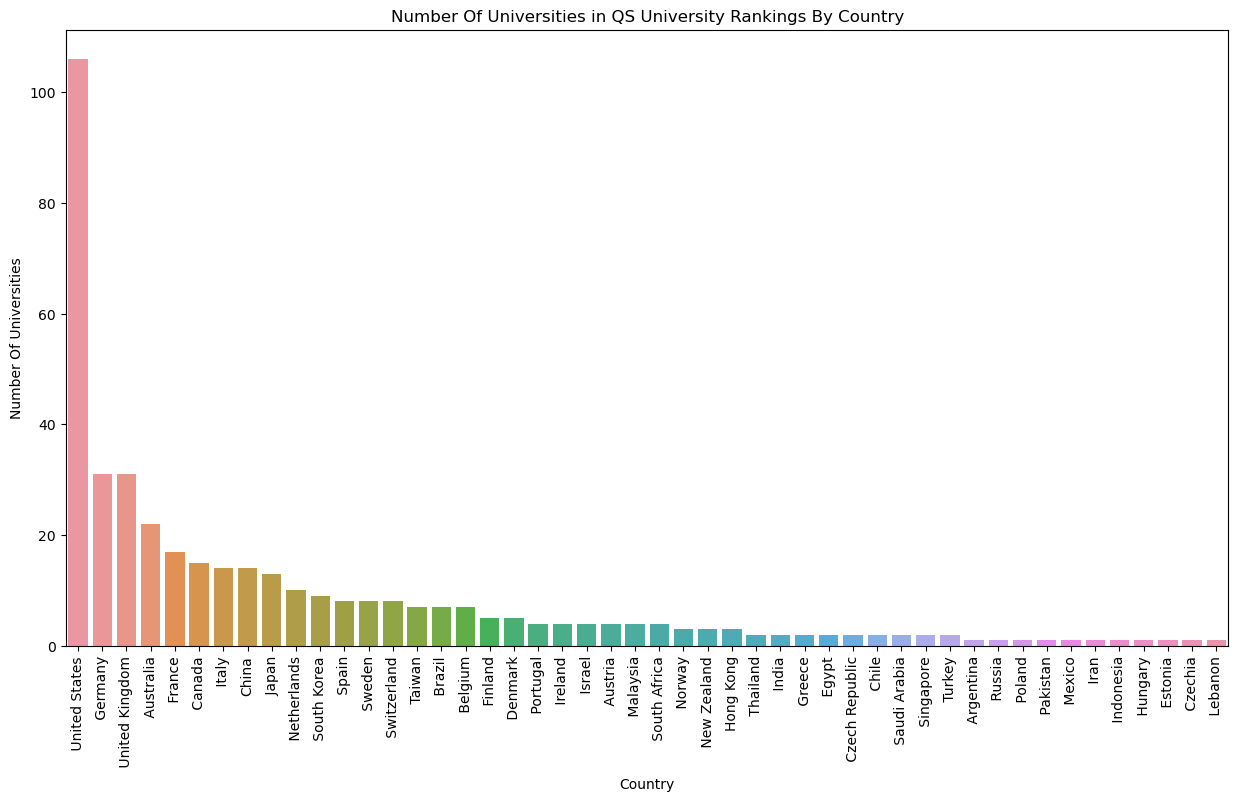

In [134]:
df = df.drop_duplicates(subset='Name', keep='first')

plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Country', order=counts.index)
plt.title('Number Of Universities in QS University Rankings By Country')
plt.xlabel('Country')
plt.ylabel('Number Of Universities')
plt.xticks(rotation=90)
plt.show()

Above is a graph showing the top 400 universities in the QS rankings in descending order. It's nice to get a visual of the data to get a clearer picture of what's happening.

In [89]:
num_countries = df['Country'].nunique()
print(num_countries)

48


As we can see, there are 48 countries in our dataset.

In [91]:
num_cities = df['City'].nunique()
print(num_cities)

326


We have 326 cities in our dataset.

In [95]:
grouped_data = df.groupby('Year')

results = []

for year, group in grouped_data:
  max_index = group['Point'].idxmax()
  name = df.loc[max_index, 'Name']
  point = df.loc[max_index, 'Point']
  results.append((year, name, point))

df_results = pd.DataFrame(results, columns=['Year', 'Name', 'Point'])

print(df_results)

   Year                Name  Point
0  2018  Harvard University   97.7
1  2019  Harvard University   98.2
2  2020  Harvard University   98.5
3  2021  Harvard University   98.6
4  2022  Harvard University   99.0


I decided to look at the top universities regarding the highest points for each year, and Harvard was the highest ranked for all five years. They also had a steady increase over these five years which is impressive.

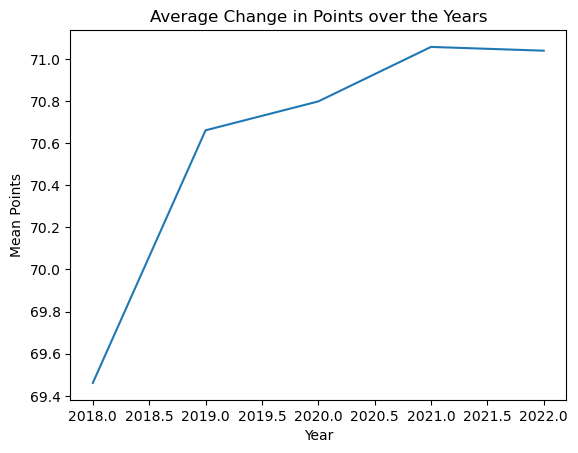

In [98]:
grouped_data = df.groupby('Year')
mean_points = grouped_data['Point'].mean()
mean_points.plot(kind='line')

plt.title('Average Change in Points over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Points')
plt.show()

I wanted to see if all of the universities, much like Harvard, had a steady increase over the years, so I decided to look at the overall average change of all universities combined. The mean points jumped quite a bit from 2018-2019. From there, there's not as stark of an increase, but nevertheless, an increase going from about 70.7 points in 2019 to just over 71 points in 2021. From 2021-2022 though, there's a slight decrease. One thing to consider is COVID and Colleges taking a hit when it comes to enrollment, along with students having to be taught virtually, which is less engaging than in-person learning, which hurts the overall learning experience. So something that I'm sure most people were certain of, which is COVID affecting students and their grades and quality of learning, even made the top universities in the world take a dip slightly in the average mean on the points scale.

Below we can see the number of universities in the QS rankings list going up yearly from 2018-2022 consistently. It started at 350 universities in 2018 up to 400 in 2022.

In [177]:
grouped_data = df.groupby('Year')

results = []

for year, group in grouped_data:
  num_universities = group['Name'].nunique()
  results.append((year, num_universities))

print(results)


[(2018, 350), (2019, 363), (2020, 372), (2021, 382), (2022, 400)]


Below are the number of universities in the list by country with 80 or more points in the QS rankings. I chose 80 points since that's a solid number to achieve as a university. Out of the 48 countries, we see that there are only 16 countries that had even one university reach 80 points on the scale. The U.S. leads it by even three times the number of the country in second place, the United Kingdom.

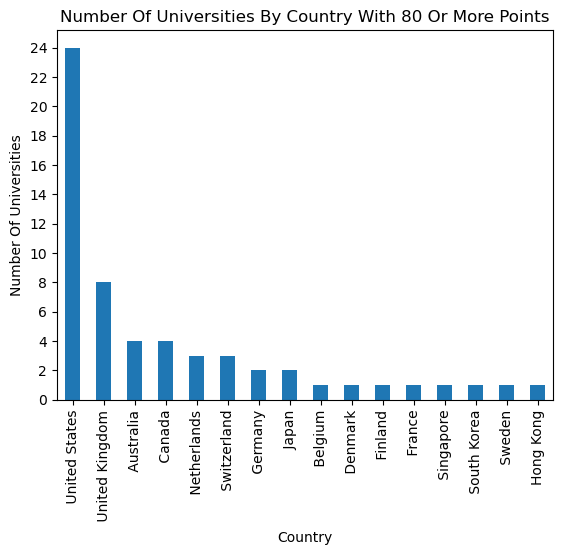

In [82]:
filtered_df = df[df['Point'] >= 80]

filtered_df = filtered_df.drop_duplicates(subset='Name', keep='first')

grouped_data = filtered_df.groupby('Country')

counts = grouped_data['Name'].size()

counts = counts.sort_values(ascending=False)

counts.plot(kind='bar')

plt.title('Number Of Universities By Country With 80 Or More Points')
plt.xlabel('Country')
plt.ylabel('Number Of Universities')

plt.yticks(np.arange(0, counts.max()+2, 2))

plt.show()


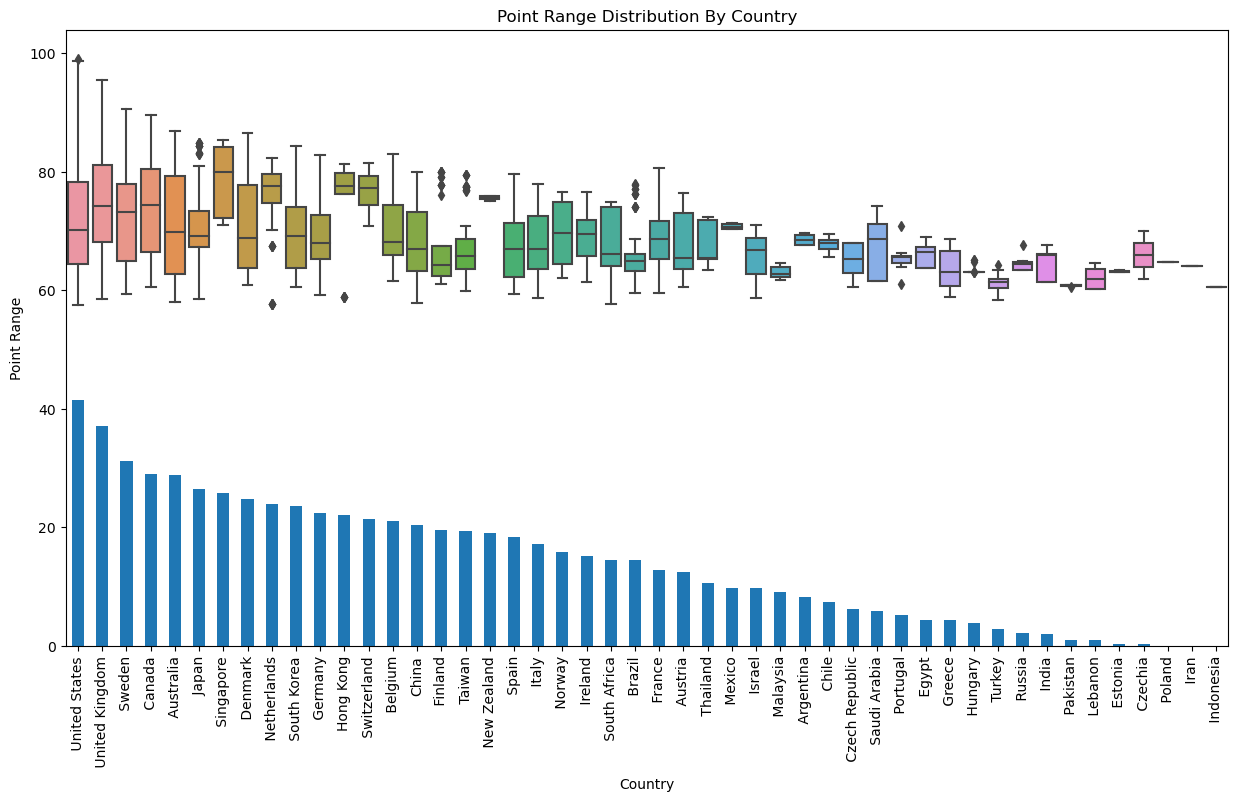

In [200]:
import seaborn as sns

df = pd.read_csv('data1.csv')

plt.figure(figsize=(15,8))

point_range = grouped_data['Point'].apply(lambda x: x.max() - x.min())

point_range = point_range.sort_values(ascending=False)

point_range.plot(kind='bar', rot=90)

sns.boxplot(x='Country', y='Point', data=df)

plt.title('Point Range Distribution By Country')
plt.xlabel('Country')
plt.ylabel('Point Range')

plt.show()


What I decided to do, since a boxplot isn't always the clearest, is to show along with the boxplot a barplot of the point distribution between all countries. I put the list in descending order from left to right, and the country with the most prominent point distribution, which is taking the largest value and subtracting the smallest value, is the United States. We can see towards the far right of the list with Poland, Iran, and Indonesia that there's almost no point distribution that's noticeable since there are very few universities that made the QS rankings list. I also printed out the numbers below to get a more accurate idea of the point distribution of the universities within these countries since the exact number is sometimes hard to decipher from graphs.

In [196]:
df = pd.read_csv('data1.csv')

grouped_data = df.groupby('Country')

point_range = grouped_data['Point'].apply(lambda x: x.max() - x.min())

point_range = point_range.round(1)

point_range = point_range.sort_values(ascending=False)

for country, point_range in point_range.iteritems():
    print(f"{country}: {point_range}")


 United States: 41.5
 United Kingdom: 37.0
 Sweden: 31.2
 Canada: 29.0
 Australia: 28.8
 Japan: 26.4
 Denmark: 25.7
 Netherlands: 24.7
 South Korea: 23.9
 Germany: 23.6
Hong Kong: 22.4
China: 22.0
 Belgium: 21.4
 France: 21.1
 Spain: 20.3
 Taiwan: 19.6
 Italy: 19.3
 Finland: 19.0
 Brazil: 18.4
 South Africa: 17.2
 Austria: 15.8
 Ireland: 15.2
 Norway: 14.4
 Singapore: 14.4
 Saudi Arabia: 12.7
 Israel: 12.4
 Switzerland: 10.6
 Greece: 9.7
 Portugal: 9.7
 Thailand: 9.0
 Czechia: 8.2
 Czech Republic: 7.4
 India: 6.2
 Turkey: 5.8
 Egypt: 5.1
 Lebanon: 4.4
 Russia: 4.3
 Chile: 3.8
 Malaysia: 2.9
 Hungary: 2.1
 Argentina: 2.0
 Mexico: 1.0
 New Zealand: 0.9
 Pakistan: 0.3
 Estonia: 0.3
 Poland: 0.0
 Iran: 0.0
 Indonesia: 0.0


We can see below how variables from 2021 onwards have trended downward for even the top 25 universities. This was mentioned earlier with how the average mean points have slightly trended downward for all universities in the dataset. Still, in this graph, we can see things are trending downward or flattening, much like the median, even for the universities at the top of the QS rankings. This shows how COVID and the implications of not being able to do in-person learning have affected the scores and overall quality of learning for even the most prestigious universities in the world.

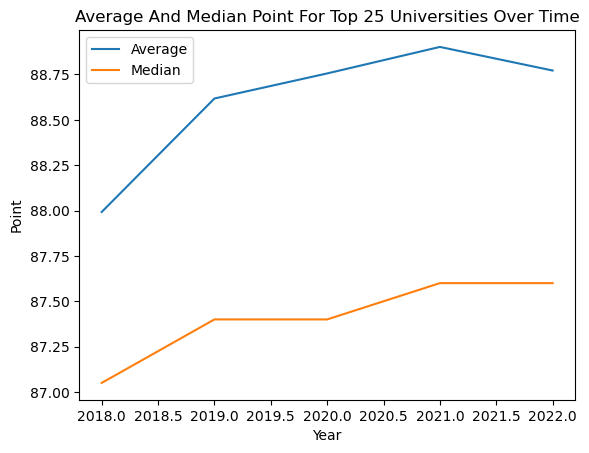

In [205]:
df = pd.read_csv('data1.csv')

top_25 = df.groupby('Year')['Rank'].apply(lambda x: x <= 25)

avg = df[top_25].groupby('Year')['Point'].mean()
median = df[top_25].groupby('Year')['Point'].median()

plt.plot(avg, label='Average')
plt.plot(median, label='Median')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Point')
plt.title('Average And Median Point For Top 25 Universities Over Time')

plt.show()


This was a fun little dive into the top universities in the world based on the QS rankings and seeing the finer details of this dataset. Something I was trying to analyze beyond seeing who the top universities were was the overall points for all universities and how much COVID and not being to learn in person has affected even the most prestigious and intellectually skilled individuals. Before going into any dataset, I try to have an approach that makes sense for me even to analyze the data. If I'm printing out statistics in the data and go nowhere with it, there's no point in doing the analysis. So for me, going into this, I already knew COVID had an effect on universities and how hard it was for students of all age ranges going from elementary school to College and having to be independent for the most part and be self-motivated to get school work done. I was curious to see if even the top universities in the world were affected by this setback, and if so, how much. It's clear it's the case that everyone from even the lowest universities in the world who aren't on the QS rankings list to even those at the top of the list were affected. Over the next couple of years, since in-person learning has been going on for a little while now, I suspect the average points, and the median will start to creep back up, but only time will tell.